In [113]:
# First we import the libraries that we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns #A ploting library with more options

In [5]:
#import data located in the '/data/Admission_Predict_Ver1.csv' folder
data = pd.read_csv('./data/Admission_Predict_Ver1.csv')

The dataset contains 500 inputs, where every row is an Indian student that applied to a master program at the USA. Every row has nine parameters which are considered for the admissions comitee of the graduate schools. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 ).

This dataset have a calculated parameter -> `Chance of admit`. This parameter has been calculated by the owner of the dataset. Unfourtanetly, the information regarding if the aplicant was admited or not is not accesible. Also, it seems that this dataset only take one application per subject, when it's a known fact that rarely one applicant apply to only one master program. Additional data from individuals could be useful, despite usually universities do not ask for age and gender information, this data could be obtained looking the moaunt of years passed from graduating and the name of the applicant. This information could be useful data to add in the future.

In [191]:
#We plot to see that everything is ok.
data.head(20)
# Data seems to be clean. 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [192]:
#If you want to see the 500 rows click here
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [31]:
#Let's see first some descriptive stats about the data
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [60]:
# Lets Check for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


Text(0.5,1,'CGPA Histogram')

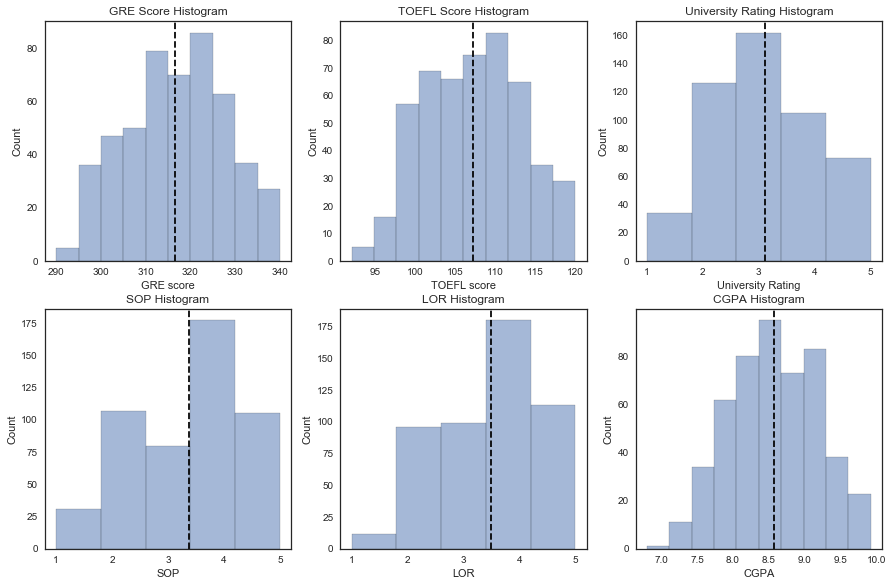

In [89]:
#Let's plot some graphs to visually explore the data
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.hist(data['GRE Score'], alpha=0.5, histtype='bar',ec='black') #Don't know the number of bins, so I would use the default option
plt.axvline(x= data['GRE Score'].mean(), linestyle = "--", color = "black",label= "Mean" )
plt.ylabel('Count')
plt.xlabel('GRE score')
plt.title('GRE Score Histogram')

plt.subplot(3,3,2)
plt.hist(data['TOEFL Score'], alpha=0.5, histtype='bar',ec='black') #Don't know the number of bins, so I would use the default option
plt.axvline(x= data['TOEFL Score'].mean(), linestyle = "--", color = "black",label= "Mean" )
plt.ylabel('Count')
plt.xlabel('TOEFL score')
plt.title('TOEFL Score Histogram')

plt.subplot(3,3,3)
plt.hist(data['University Rating'], bins= 5, alpha=0.5, histtype='bar',ec='black') #Ranking from 1 to 5, integers
plt.axvline(x= data['University Rating'].mean(), linestyle = "--", color = "black",label= "Mean" )
plt.ylabel('Count')
plt.xlabel('University Rating')
plt.title('University Rating Histogram')

plt.subplot(3,3,4)
plt.hist(data['SOP'], bins= 5, alpha=0.5, histtype='bar',ec='black') #Ranking from 1 to 5, integers
plt.axvline(x= data['SOP'].mean(), linestyle = "--", color = "black",label= "Mean" )
plt.ylabel('Count')
plt.xlabel('SOP')
plt.title('SOP Histogram')

plt.subplot(3,3,5)
plt.hist(data['LOR '], bins= 5, alpha=0.5, histtype='bar',ec='black') #Ranking from 1 to 5, integers
plt.axvline(x= data['LOR '].mean(), linestyle = "--", color = "black",label= "Mean" )
plt.ylabel('Count')
plt.xlabel('LOR')
plt.title('LOR Histogram')

plt.subplot(3,3,6)
plt.hist(data['CGPA'], bins= 10, alpha=0.5, histtype='bar',ec='black') #Indian GPA is from 1 to 10
plt.axvline(x= data['CGPA'].mean(), linestyle = "--", color = "black",label= "Mean" )
plt.ylabel('Count')
plt.xlabel('CGPA')
plt.title('CGPA Histogram')


Some inferences about the data


In [79]:
#Let's see if we could plot a correlation plot with all our variables
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


C:\Users\joaqu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\joaqu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


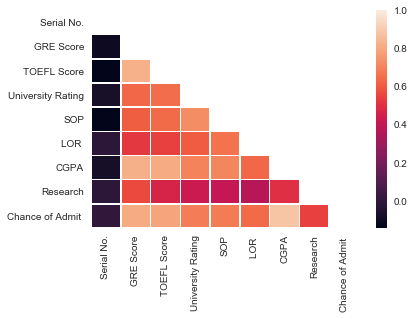

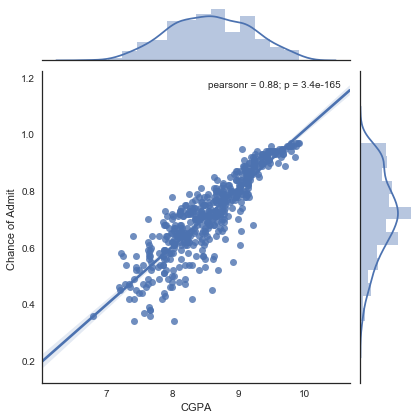

In [107]:
#Let's make a triangular heatmap. 
sns.set(style="white")

mask = np.zeros_like(data.corr(), dtype=np.bool)  #creates a matrix of zeros of the same size as the correlation matrix
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(data.corr(), mask = mask, linewidths=.5)

sns.jointplot(x='CGPA', y='Chance of Admit ', data= data, kind="reg");

some inferences about this. and that CGPA is the most correlated variable.

R2 = 0.656668 
 p = 0.000000


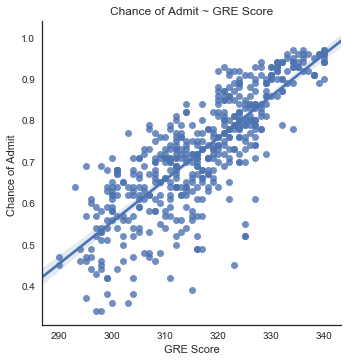

In [122]:
#Lets analyze if the eigth first parameters have a linear relation with the parameter 'Chances of Admit'. 
#In a ideal world, We would have the results of the applications. But given that this data set do not have this, we would use this variable as it was 
#the dependent variable of our model

g = sns.lmplot(x='GRE Score', y='Chance of Admit ', data= data)
plt.title("Chance of Admit ~ GRE Score")
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['GRE Score'], y=data['Chance of Admit '])
print ('R2 = %f \n p = %f' % (r_value**2,p_value))

R2 = 0.627625 
 p = 0.000000


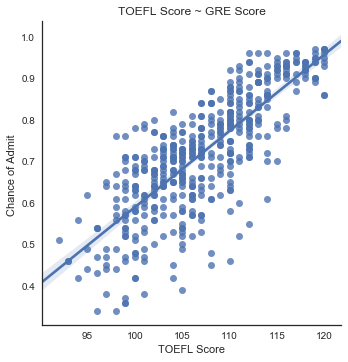

In [123]:
g = sns.lmplot(x='TOEFL Score', y='Chance of Admit ', data= data)
plt.title("TOEFL Score ~ GRE Score")
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['TOEFL Score'], y=data['Chance of Admit '])
print ('R2 = %f \n p = %f' % (r_value**2,p_value))

R2 = 0.476283 
 p = 0.000000


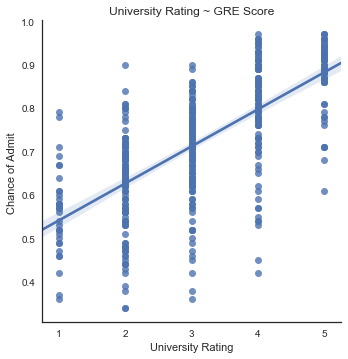

In [124]:
g = sns.lmplot(x='University Rating', y='Chance of Admit ', data= data)
plt.title("University Rating ~ GRE Score")
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['University Rating'], y=data['Chance of Admit '])
print ('R2 = %f \n p = %f' % (r_value**2,p_value))

R2 = 0.468043 
 p = 0.000000


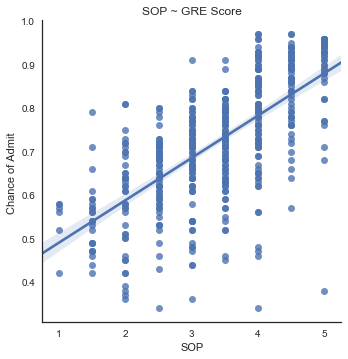

In [125]:
g = sns.lmplot(x='SOP', y='Chance of Admit ', data= data)
plt.title("SOP ~ GRE Score")
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['SOP'], y=data['Chance of Admit '])
print ('R2 = %f \n p = %f' % (r_value**2,p_value))

R2 = 0.416495 
 p = 0.000000


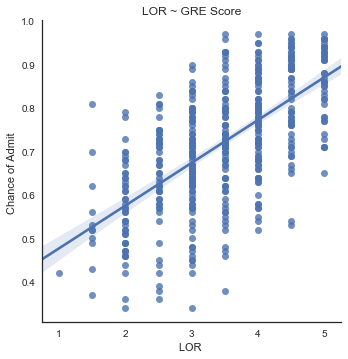

In [126]:
g = sns.lmplot(x='LOR ', y='Chance of Admit ', data= data)
plt.title("LOR ~ GRE Score")
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['LOR '], y=data['Chance of Admit '])
print ('R2 = %f \n p = %f' % (r_value**2,p_value))

R2 = 0.778652 
 p = 0.000000


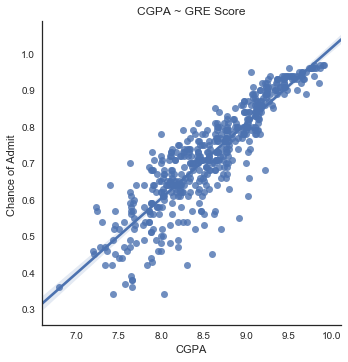

In [127]:
g = sns.lmplot(x='CGPA', y='Chance of Admit ', data= data)
plt.title("CGPA ~ GRE Score")
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['CGPA'], y=data['Chance of Admit '])
print ('R2 = %f \n p = %f' % (r_value**2,p_value))

Some inferences about the possible variables and their descriptive power

We have the hypothesis that research experience could be a booster.

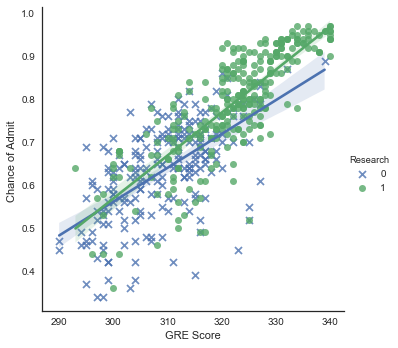

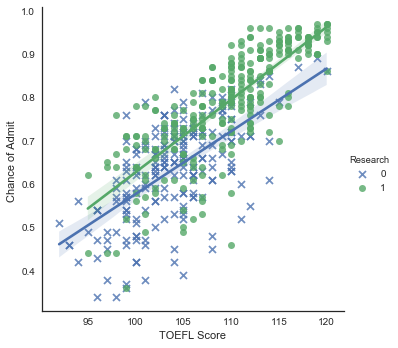

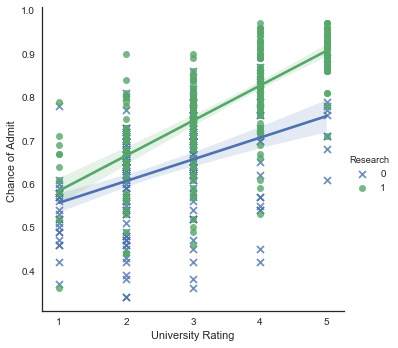

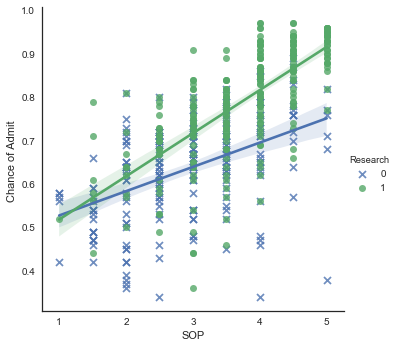

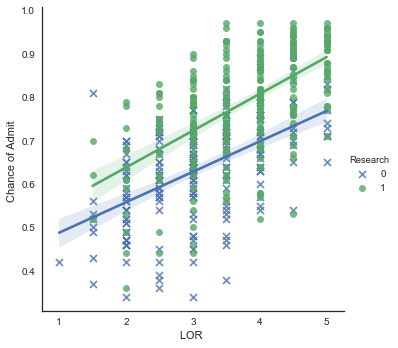

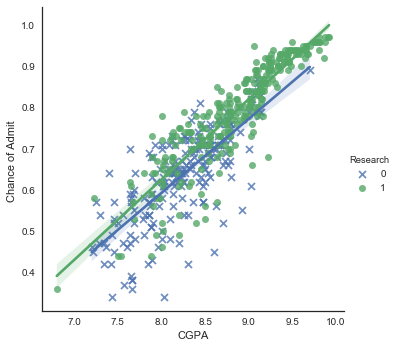

In [149]:
g = sns.lmplot(x='GRE Score', y='Chance of Admit ', hue= 'Research' , truncate = True, markers=['x', 'o'],data= data)
g = sns.lmplot(x='TOEFL Score', y='Chance of Admit ', hue= 'Research' , truncate = True, markers=['x', 'o'],data= data)
g = sns.lmplot(x='University Rating', y='Chance of Admit ', hue= 'Research' , truncate = True, markers=['x', 'o'],data= data)
g = sns.lmplot(x='SOP', y='Chance of Admit ', hue= 'Research' , truncate = True, markers=['x', 'o'],data= data)
g = sns.lmplot(x='LOR ', y='Chance of Admit ', hue= 'Research' , truncate = True, markers=['x', 'o'],data= data)
g = sns.lmplot(x='CGPA', y='Chance of Admit ', hue= 'Research' , truncate = True, markers=['x', 'o'],data= data)

Some inferences about how research seem  to be a factor that interact to university ranking and SOP. It is intersting how the slope is almost the same in LOR for both values of the research variable, nevertheless the intercept is different. This could be interpretated as the fact that a letter of recomendation from a researcher (possible) is going to have more impact than a normal recomendation letter from a professor.

In [169]:
#plt.figure(figsize=(10,10))
#sns.violinplot(x = 'University Rating', y='Chance of Admit ', hue= 'Research', split= 'True', inner= 'quart',data=data)
#sns.despine(offset=10, trim=True)

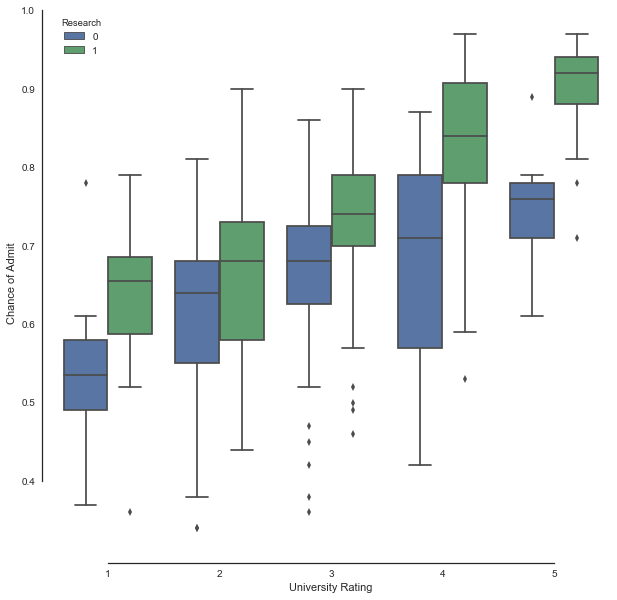

In [168]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University Rating', y='Chance of Admit ', hue= 'Research',data=data)
sns.despine(offset=10, trim=True)

In [182]:
We can observe that TOP Universities tend to prioritize research background when they admit students.
Universities with the lowest rating also seem to give more importance to research background. 

SyntaxError: invalid syntax (<ipython-input-182-fd84fed73af8>, line 1)